<a href="https://colab.research.google.com/github/amany-adel/Amazon-Sales-Data-Analytics-Task/blob/main/Analysis%20%26%20Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
####### DATA INSPECTION ###########

# Upload the CSV file

from google.colab import drive
import pandas as pd

drive.mount('/content/drive/')
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Amazon Data analysis/Amazon Sale Report.csv')


Mounted at /content/drive/


<ipython-input-1-4e1e59221b2c>:9: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Amazon Data analysis/Amazon Sale Report.csv')


In [ ]:
#read the data
from sklearn import datasets

data.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [ ]:
#Exploring the data
print ("# of Rows = {} ".format( data.shape[0]))
print ("# of Columns = {} ".format( data.shape[1]))

# of Rows = 128975 
# of Columns = 24 


In [ ]:
print(data.dtypes)

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
promotion-ids          object
B2B                      bool
fulfilled-by           object
Unnamed: 22            object
dtype: object


In [ ]:
# Checking for incorrect data types
potential_issues = []

for col in data.columns:
  # Check if numeric columns are stored as objects (strings)
  if data[col].dtypes == 'object':

    if data[col].astype(str).str.isnumeric().all():
      potential_issues.append('column {} should be numeric'.format(col))

  # Check for boolean columns stored as objects
    elif set(data[col].unique()) <= {'yes', 'no'}:
      potential_issues.append('column {} should be bool'.format(col))

  # Check for potential boolean columns with numeric values
  elif data[col].dtypes in ['float64', 'int64']:
    unique_values = data[col].dropna().unique()
    if len(unique_values) == 2 and set(unique_values) <= {0, 1}:
      potential_issues.append('column {} should be bool'.format(col))

  # Check if float columns should be integers
  elif data[col].dtypes == 'float64':
    if (data[col] % 1 == 0).all():
      data[col] = data[col].astype(int)
      potential_issues.append('column {} should be integer'.format(col))

for issue in potential_issues:
  print("-", issue)

In [ ]:
############### SUMMARY STATISTICS #################

# summarize numerical data

summary=data.drop(['index','ship-postal-code'],axis=1,inplace=False).describe()
summary



,Qty,Amount
count,128975.000000,121180.000000
mean,0.904431,648.561465
std,0.313354,281.211687
min,0.000000,0.000000
25%,1.000000,449.000000
50%,1.000000,605.000000
75%,1.000000,788.000000
max,15.000000,5584.000000


In [ ]:
# summarize categorical data

categorical_columns = data.describe(include=['object','bool'])
categorical_columns


,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,currency,ship-city,ship-state,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
count,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,122103,121180,128942,128942,128942,79822,128975,39277,79925
unique,120378,91,13,2,2,2,1377,7195,9,11,7190,3,1,8955,69,1,5787,2,1,1
top,171-5057375-2831560,05-03-22,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,Shipped,INR,BENGALURU,MAHARASHTRA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,False
freq,12,2085,77804,89698,128851,88615,4224,773,50284,22711,773,109487,121180,11217,22260,128942,46100,128104,39277,79925


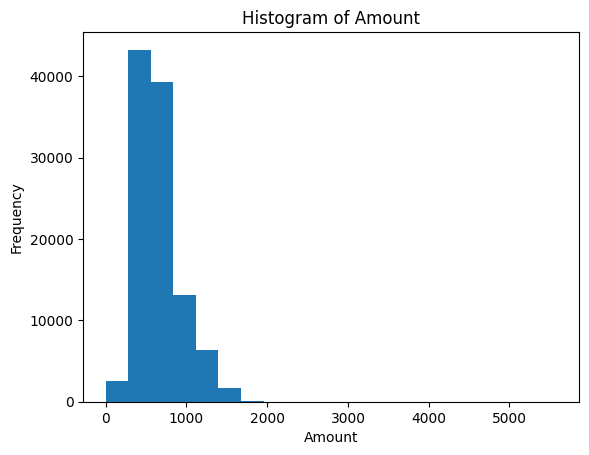

In [ ]:
#Visualization
import matplotlib.pyplot as plt

completed_statuses = ['Shipped', 'Shipped - Delivered to Buyer', 'Delivered']
data_completed = data[data['Status'].isin(completed_statuses)]


plt.hist(data_completed['Amount'].dropna(), bins=20)
plt.title('Histogram of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


In [ ]:

########## Handling Missing Values ###################3
data.drop(columns=['Unnamed: 22'], inplace=True)

data['Courier Status'].fillna('Unknown', inplace=True)
data['currency'].fillna('Unknown', inplace=True)
data['ship-city'].fillna('Unknown', inplace=True)
data['ship-state'].fillna('Unknown', inplace=True)
data['ship-postal-code'].fillna(0, inplace=True)
data['ship-country'].fillna('Unknown', inplace=True)
data['promotion-ids'].fillna('None', inplace=True)
data['fulfilled-by'].fillna('Unknown', inplace=True)
data['Amount'].fillna(data['Amount'].median(), inplace=True)

print(data.isnull().sum())

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
fulfilled-by          0
dtype: int64


In [ ]:
############ DATA TYPE CONVERSION #############
from google.colab import files
data['Date'] = pd.to_datetime(data['Date'], format='%m-%d-%y')


In [ ]:
############ OUTLIERS DELETION #############

q1 = data['Amount'].quantile(0.25)
q3 = data['Amount'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
data = data[(data['Amount'] >= lower_bound) & (data['Amount'] <= upper_bound)]



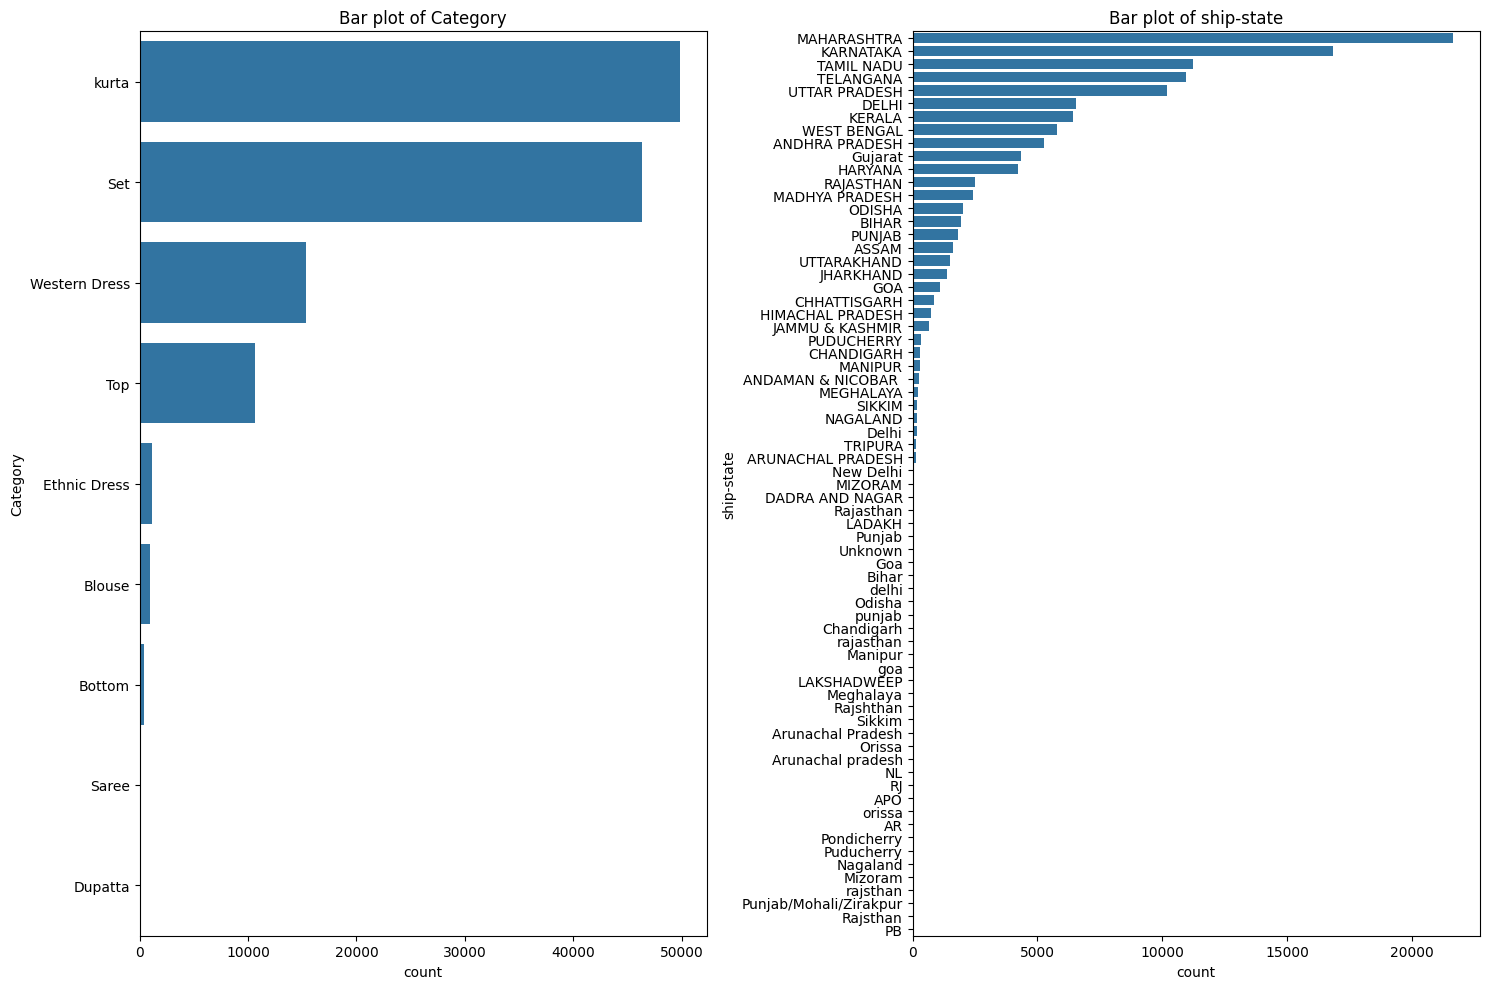

In [ ]:
########### VISUALIZATION ##############
import seaborn as sns

# Disrtipution of categorical features

categorical_features = ['Category', 'ship-state']
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_features), figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    sns.countplot(y=data[feature], order=data[feature].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Bar plot of {feature}')
plt.tight_layout()
plt.show()

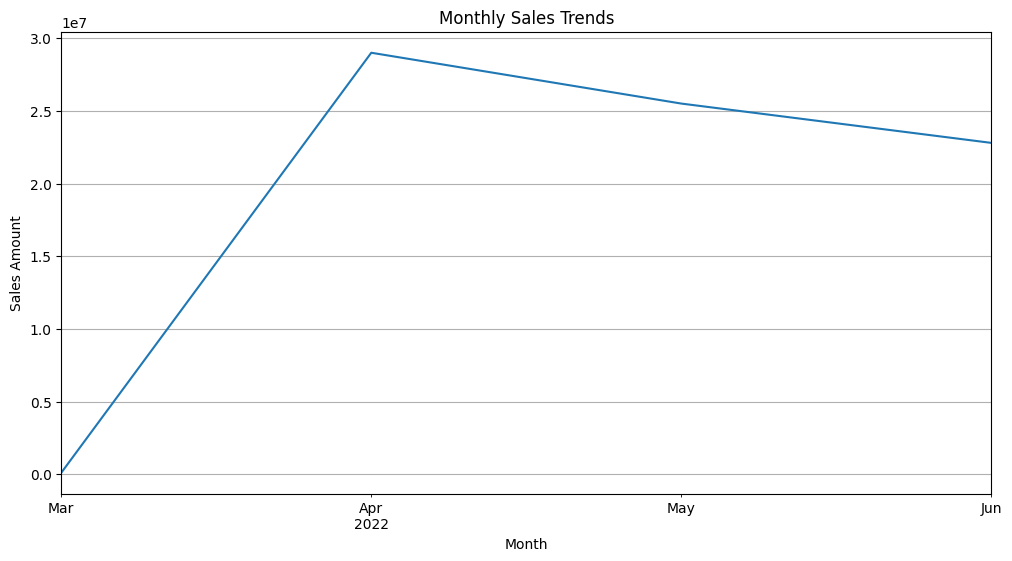

In [ ]:
# visualise monthly sales
monthly_sales = data.groupby(data['Date'].dt.to_period('M'))['Amount'].sum()
monthly_sales.plot(kind='line', figsize=(12, 6))
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.show()

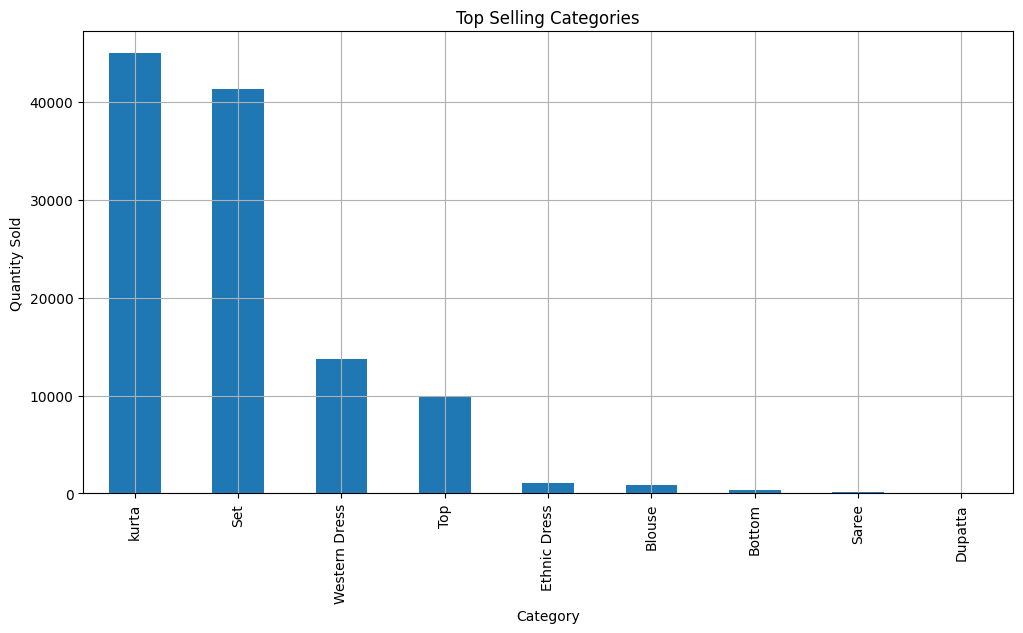

In [ ]:
# Identify top-selling category
top_selling_categories = data.groupby('Category')['Qty'].sum().nlargest(10)
top_selling_categories.plot(kind='bar', figsize=(12, 6))
plt.title('Top Selling Categories')
plt.xlabel('Category')
plt.ylabel('Quantity Sold')
plt.grid(True)
plt.show()

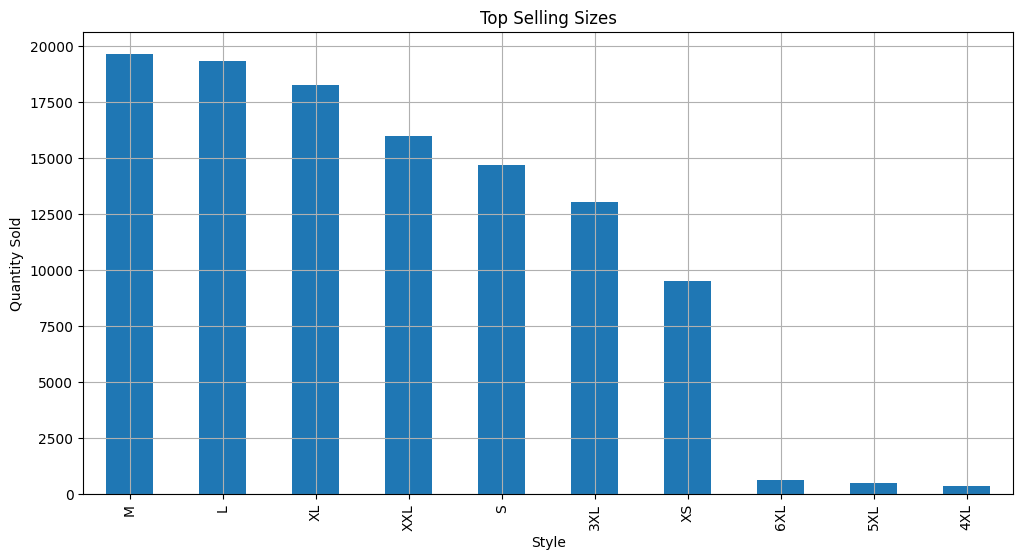

In [ ]:
# Identify top-selling sizes
top_selling_products = data.groupby('Size')['Qty'].sum().nlargest(10)
top_selling_products.plot(kind='bar', figsize=(12, 6))
plt.title('Top Selling Sizes')
plt.xlabel('Style')
plt.ylabel('Quantity Sold')
plt.grid(True)
plt.show()

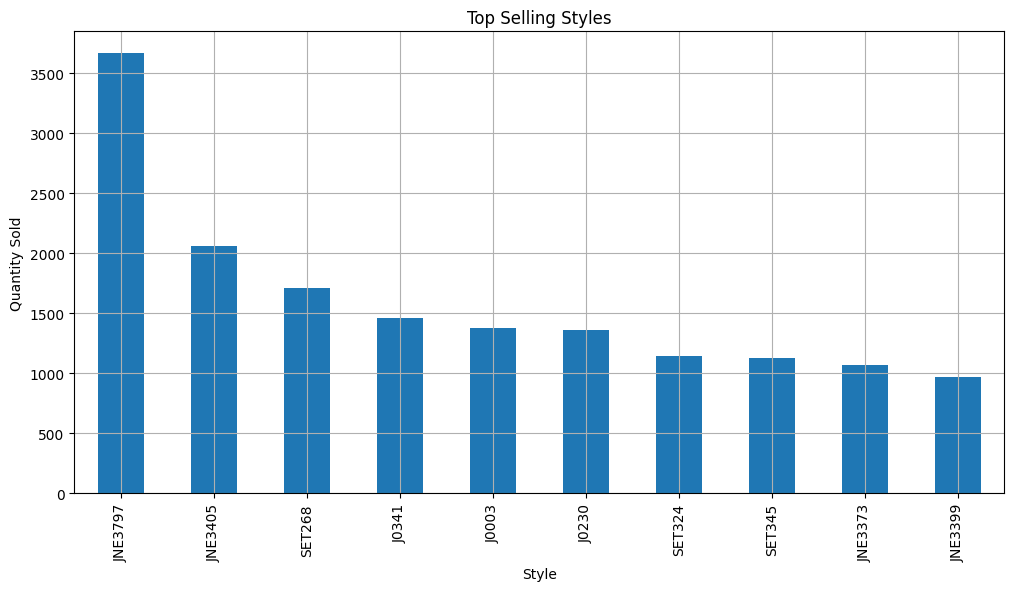

In [ ]:
# Identify top-selling styles
top_selling_products = data.groupby('Style')['Qty'].sum().nlargest(10)
top_selling_products.plot(kind='bar', figsize=(12, 6))
plt.title('Top Selling Styles')
plt.xlabel('Style')
plt.ylabel('Quantity Sold')
plt.grid(True)
plt.show()

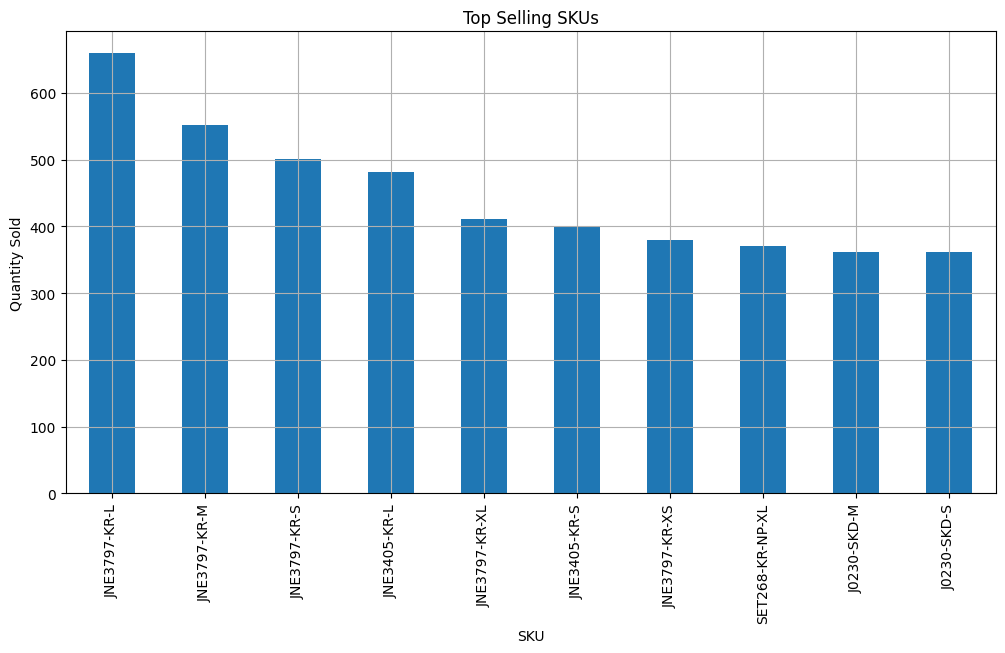

In [ ]:
# Identify top-selling stock keeping units
top_selling_products = data.groupby('SKU')['Qty'].sum().nlargest(10)
top_selling_products.plot(kind='bar', figsize=(12, 6))
plt.title('Top Selling SKUs')
plt.xlabel('SKU')
plt.ylabel('Quantity Sold')
plt.grid(True)
plt.show()

<ipython-input-63-a11940c53e53>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Amount', y='ship-city', data=top_cities, palette='viridis')


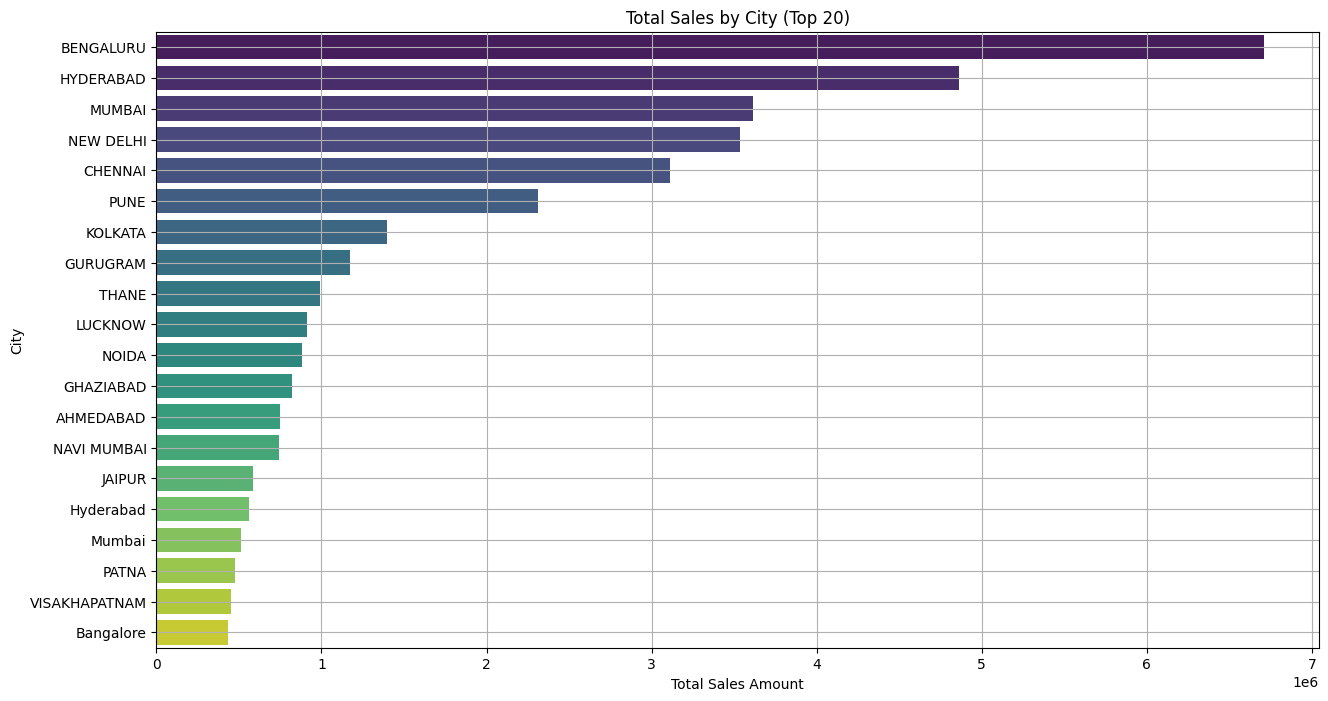

In [ ]:
# Analyze regional sales distributions
state_sales = data.groupby('ship-state')['Amount'].sum().reset_index()

# Sort the data by sales amount in descending order
state_sales = state_sales.sort_values(by='Amount', ascending=False)


# Plot the total sales by city using a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='Amount', y='ship-city', data=top_cities, palette='viridis')
plt.title('Total Sales by City (Top 20)')
plt.xlabel('Total Sales Amount')
plt.ylabel('City')
plt.grid(True)
plt.show()